# 4. Multiplexing B 
---------------------------------------------


In [1]:
from IPython.core.display import HTML


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

### Comments

This chapter discusses useful approximation results: it provides other illustrations of the CLT, shows how the exponential distribution approaches the geometric distribution, and how the Poisson distribution approaches the binomial distribution.

## 4.1. Central Limit Theorem

Our goal is to illustrate the CLT (see **3.3** in Chapter 3 of this notebook) that we recall here:

**Theorem (CLT)**
Let $Y_1, Y_2, \ldots$ be independent and identically distributed random variables with mean $\mu$ and variance $\sigma^2$. Let also $X(N) = Y_1 + \cdots + Y_N$.  Then
$$\frac{X(N) - N \mu}{\sigma\sqrt{N}} \Rightarrow {\cal N}(0,1).$$

To demonstrate this result, we perform brute-force simulations.  We generate $M \gg 1$ times the random variables $\{Y_1, \ldots, Y_N\}$ and we compute $Z = (X(N)/N - N \mu)/(\sigma \sqrt{N})$.  We then plot the empirical cumulative distribution $F(x) = (1/M) \sum_m 1\{Z_m \leq x\} $ where $Z_m$ is the value of $Z$ during simulation $m$.  We then compare $F(x)$ and the cdf of a ${\cal N}(0,1)$ random variable.

We do this in three cases: In case (a), the $Y_n$ are $U[0, 1]$; in case (b), they are $U\{1, 2, \ldots, 6\}$; in case (c), they are $Expo(1)$.

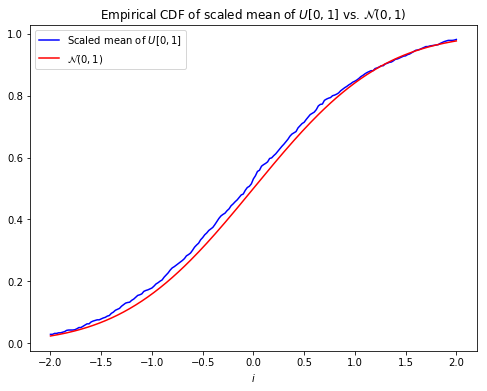

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
figsize(8, 6)

import scipy.stats as stats

from ipywidgets import *
from IPython.display import display

V = widgets.IntSlider(description='N', min = 10, max = 500, step = 10, value = 300)

def CLT3_demo(w,N):
    M = 1000
    S = 100
    a = np.arange(0.0, 2*S + 1)
    b = np.arange(0.0, 2*S + 1)
    c = np.arange(0.0, 2*S + 1)
    
    if w == '(a)':
        mu = 0.5
        sigma = np.sqrt(1/12)
        L = "$U[0, 1]$"
    elif w == '(b)':
        mu = 3.5
        L = "$U\{1,\ldots,6\}$"
        sigma = 1.7
    elif w == '(c)':
        mu = 1
        sigma = 1
        L = "$Expo(1)$"
    z = np.arange(0.0,M+1)
    for m in range(0,M+1):
        y = 0.0
        for n in range(0,N-1):
            if w == '(a)':
                y = y + np.random.random()
            elif w == '(b)':
                y = y + np.random.randint(1,7)
            elif w == '(c)':
                y = y + np.random.exponential(1)
        z[m] = (y - N*mu)/(sigma*N**0.5) 
    b[0] = 0.0
    for i in range(0,2*S+1):
        a[i] = 2*i/S - 2
        b[i]=0.0
        for m in range(0,M+1):
            if z[m] <= a[i]:
                b[i] = b[i]+1.0
        b[i] = b[i]/M
        c[i] = norm.cdf(a[i],0,1)
    plt.plot(a, b, color='b',label="Scaled mean of "+ L) 
    plt.plot(a, c, color='r',label="${\cal N}(0,1)$")
    plt.legend()
    plt.xlabel("$i$")
    plt.title("Empirical CDF of scaled mean of " +L + " vs. ${\cal N}(0,1)$")
    
u = widgets.ToggleButtons(options=['(a)', '(b)', '(c)'],
    description='Case:',
    disabled=False,
    button_style='info', 
    tooltip='Description',
#     icon='check'
)
    
z = widgets.interactive(CLT3_demo, w = u, N = V) 
display(z) 

## 4.2 Characteristic Function

Our main tool in this chapter is the characteristic function.


**Definition:**

The **characteristic function** $\phi_X$ of a random variable $X$ is defined by
$$\phi_X(u) = E[e^{iuX}] = \int_{- \infty}^{+ \infty} e^{iux} f_X(x)dx, u \in \Re. \tag{4.1}$$
In this expression, $f_X(x)$ is the pdf of $X$.

Thus, $\phi_X$ is the **Fourier Transform** of $f_X$.

Here are a few properties of the characteristic function.

**Theorem: Properties of the Characteristic Function**

(a) $\phi_X$ characterizes uniquely $f_X$. 

(b) If $\phi(X_n) \to \phi(X)$ as $n \to \infty$, then $X_n \Rightarrow X$.

(c) If $X$ and $U$ are independent, then $\phi_{X + Y}(u) = \phi_X(u)\phi_Y(u)$.

(d) $\phi^\prime_X(0) = iu E(X)$.

(e) $\frac{d^k}{dx^k} \phi_X(0) = (iu)^k E(X^k)$.

**Note on Proofs:**

(c), (d), (e) are obvious.  (a) is a property of the Fourier Transform. It says that if two functions have the same Fourier Transform, then they are identical.  In (b), $X_n \Rightarrow X$ means that the cdf of $X_n$ converges to that of $X$.  The proof of that result is not easy.

**Examples:**

(a) If $X =_D {\cal N}(\mu,\sigma^2)$, then $\phi_X(u) = \exp \{i u \mu - \frac{1}{2} u^2 \sigma^2\}$.

(b) If $X =_D B(p)$, then $\phi_X(u) = 1 + p(e^{iu} - 1)$.

(c) If $X =_D B(n,p)$, then $\phi_X(u) = [1 + p(e^{iu} - 1)]^n$.

(d) If $X =_D G(p)$, then $\phi_X(u) = pe^{iu}[1 - (1 - p)e^{iu}]^{-1}$.

(e) If $X =_D Expo(\lambda)$, then $\phi_X(u) = \frac{\lambda}{\lambda - iu}$.

(g) If $X =_D P(\lambda)$, then $\phi_X(u) = \exp\{\lambda(e^{iu} - 1)\}$.



## 4.3 Approximation Results

Here are a few useful approximations.

**Theorem:**  As $n \to \infty$,

(a) $B(n, \frac{\lambda}{n}) \Rightarrow P(\lambda)$;

(b) $\frac{1}{n}G(\frac{\lambda}{n}) \Rightarrow Expo(\lambda)$;

(c) $\frac{1}{\sqrt{n}}(P(n \lambda) - n \lambda) \Rightarrow {\cal N}(0, \lambda^2)$;

(d) $\frac{1}{\sqrt{n}}(B(n, p) - np) \Rightarrow {\cal N}(0, p(1-p))$;

**Proof:**

The book proves these results.  To illustrate the method, here is a proof of (a).  Using Example (c), the characteristic function of $B(n, \frac{\lambda}{n})$ is $[1 + (\lambda/n)(e^{iu} - 1)]^n$.  Since $(1 + x/n)^n \to \exp\{x\}$,
this characteristic function converges to $\exp\{\lambda(e^{iu} - 1)\}$, which is the characteristic function of $P(\lambda)$, by Example (e).

Note that (c) follows from the CLT because $P(n \lambda)$ is distributed like the sum of $n$ independent $P(\lambda)$ random variables.Similarly, (d)  follows from the CLT and the fact that $B(n,p)$ is distributed like the sum of $n$ independent $B(1,p)$ random variables. 

The plots below illustrate these results. For each example, we plot the CDF of the random variables indexed by $n$ versus the limiting CDF.

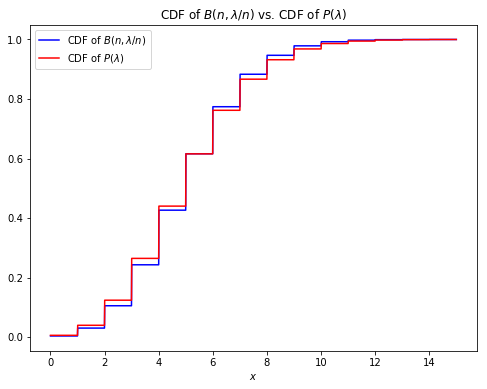

In [3]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from IPython.display import clear_output
import numpy as np
from scipy.stats import poisson
from scipy.stats import binom
from matplotlib import pyplot as plt
figsize(8, 6)

import scipy.stats as stats

from ipywidgets import *
from IPython.display import display

def CONV_a(n,L): 
    lamb = L
    S = 2000
    a = np.arange(0.0, S)
    c = np.arange(0.0, S)
    d = np.arange(0.0, S)
    for i in range(0,S):
        a[i] = 3*lamb*i/S
        c[i] = poisson.cdf(a[i],lamb)
        d[i] = binom.cdf(a[i], n, lamb/n)
    plt.plot(a, d, color='b',label="CDF of $B(n, \lambda/n)$") 
    plt.plot(a, c, color='r',label="CDF of $P(\lambda)$")
    plt.legend()
    plt.xlabel("$x$")
    plt.title("CDF of $B(n,\lambda/n)$ vs. CDF of $P(\lambda)$")
V1 = widgets.IntSlider(description='n', min = 10, max = 60, step = 5, value = 35)
V2 = widgets.FloatSlider(description='$\lambda$', min = 0.1 , max = 10, step = 0.1, value = 5)
z = widgets.interactive(CONV_a, n=V1,L=V2) 
display(z)

 

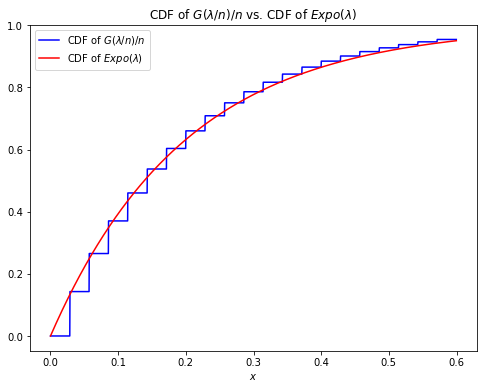

In [4]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from IPython.display import clear_output
import numpy as np
from scipy.stats import geom
from scipy.stats import expon
from matplotlib import pyplot as plt
figsize(8, 6)

import scipy.stats as stats

from ipywidgets import *
from IPython.display import display
       
def CONV_b(n,L):
    lamb = L
    S = 2000
    a = np.arange(0.0, S)
    c = np.arange(0.0, S)
    d = np.arange(0.0, S)
    for i in range(0,S):
        a[i] = (3*i)/(lamb*S)
        c[i] = expon.cdf(a[i]*lamb)
        d[i] = geom.cdf(a[i]*n,lamb/n)
    plt.plot(a, d, color='b',label="CDF of $G(\lambda/n)/n$") 
    plt.plot(a, c, color='r',label="CDF of $Expo(\lambda)$")
    plt.legend()
    plt.xlabel("$x$")
    plt.title("CDF of $G(\lambda/n)/n$ vs. CDF of $Expo(\lambda)$")
   

W1 = widgets.IntSlider(description='n', min = 10, max = 60, step = 5, value = 35)
W2 = widgets.FloatSlider(description='$\lambda$', min = 0.1 , max = 10, step = 0.1, value = 5)
z = widgets.interactive(CONV_b, n=W1,L=W2) 
display(z)


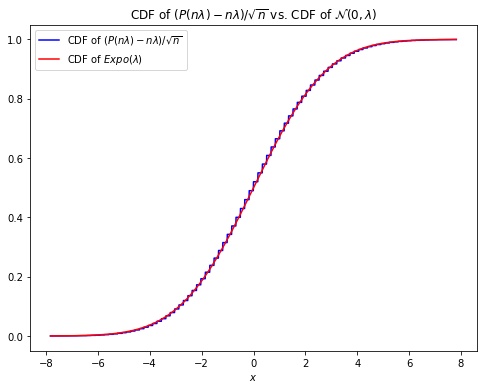

In [5]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from IPython.display import clear_output
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
from matplotlib import pyplot as plt
figsize(8, 6)

import scipy.stats as stats
from ipywidgets import *
from IPython.display import display

        
def CONV_c(n,L):
    lamb = L
    S = 2000
    a = np.arange(0.0, S)
    c = np.arange(0.0, S)
    d = np.arange(0.0, S)
    for i in range(0,S):
        a[i] = 3.5*lamb**0.5*(2*i - S)/S
        c[i] = norm.cdf(a[i], 0, lamb**0.5)
        d[i] = poisson.cdf(n**0.5*a[i] + n*lamb, n*lamb)
    plt.plot(a, d, color='b',label="CDF of $(P(n \lambda) - n \lambda)/\sqrt{n}$") 
    plt.plot(a, c, color='r',label="CDF of $Expo(\lambda)$")
    plt.legend()
    plt.xlabel("$x$")
    plt.title("CDF of $(P(n \lambda) - n \lambda)/\sqrt{n}$ vs. CDF of ${\cal N}(0,\lambda)$")
   

W1 = widgets.IntSlider(description='n', min = 10, max = 60, step = 5, value = 35)
W2 = widgets.FloatSlider(description='$\lambda$', min = 0.1 , max = 10, step = 0.1, value = 5)
z = widgets.interactive(CONV_c, n=W1,L=W2) 
display(z)

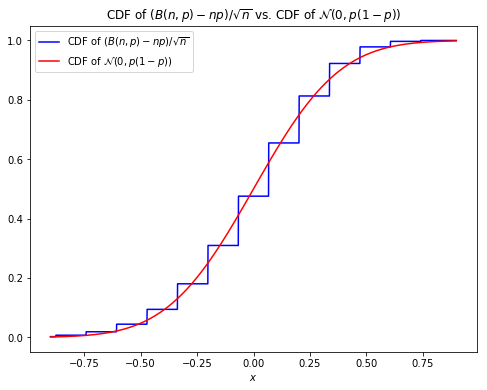

In [6]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from IPython.display import clear_output
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
from matplotlib import pyplot as plt
figsize(8, 6)

import scipy.stats as stats
from ipywidgets import *
from IPython.display import display

        
def CONV_d(n,L):
    p = L
    sig = (p*(1-p))**0.5
    S = 2000
    a = np.arange(0.0, S)
    c = np.arange(0.0, S)
    d = np.arange(0.0, S)
    for i in range(0,S):
        a[i] = 3*sig*(2*i - S)/S
        c[i] = norm.cdf(a[i], 0, sig)
        d[i] = binom.cdf(n**0.5*a[i] + n*p, n, p)
    plt.plot(a, d, color='b',label="CDF of $(B(n,p)-np)/\sqrt{n}$") 
    plt.plot(a, c, color='r',label="CDF of ${\cal N}(0, p(1-p))$")
    plt.legend()
    plt.xlabel("$x$")
    plt.title("CDF of $(B(n,p)-np)/\sqrt{n}$ vs. CDF of ${\cal N}(0, p(1-p))$")
   

W1 = widgets.IntSlider(description='n', min = 10, max = 60, step = 5, value = 35)
W2 = widgets.FloatSlider(description='$p$', min = 0.1 , max = 1, step = 0.1, value = 0.5)
z = widgets.interactive(CONV_d, n=W1,L=W2) 
display(z)